# Setup & Importing Packages


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import io
import statistics as stats
import csv
import itertools
import copy

from google.colab import files
from sklearn.cluster import spectral_clustering as SCL
from networkx.algorithms.community import girvan_newman, greedy_modularity_communities


# Defining Algorithms


In [2]:
#DEGREE DISTRIBUTION CALCULATOR

G_type = "null"

def degree_dist(G):
    global degrees
    degrees = [G.degree(n) for n in G.nodes()]

    plt.hist(degrees)
    plt.title("{} Degree Centrality Distribution".format(G_type))
    plt.xlabel("Node Degree")
    plt.ylabel("Frequency")
    plt.show()

    global degree_min
    degree_min = np.quantile(degrees, 0)
    global degree_q1
    degree_q1 = np.quantile(degrees, 0.25)
    global degree_q2
    degree_q2 = np.quantile(degrees, 0.5)
    global degree_q3
    degree_q3 = np.quantile(degrees, 0.75)
    global degree_max
    degree_max = np.quantile(degrees, 1)
    global degree_avg
    degree_avg = sum(degrees) / len(degrees)
    global degree_stdev
    degree_stdev = stats.stdev(degrees)

    return degree_min , degree_q1 , degree_q2 , degree_q3 , \
    degree_max , degree_avg , degree_stdev


In [3]:
def in_degree_dist(G):
    global in_degrees
    in_degrees = [G.in_degree(n) for n in G.nodes()]

    plt.hist(in_degrees)
    plt.title("{} In Degree Centrality Distribution".format(G_type))
    plt.xlabel("Node In Degree")
    plt.ylabel("Frequency")
    plt.show()

    global in_degree_min
    in_degree_min = np.quantile(in_degrees, 0)
    global in_degree_q1
    in_degree_q1 = np.quantile(in_degrees, 0.25)
    global in_degree_q2
    in_degree_q2 = np.quantile(in_degrees, 0.5)
    global in_degree_q3
    in_degree_q3 = np.quantile(in_degrees, 0.75)
    global in_degree_max
    in_degree_max = np.quantile(in_degrees, 1)
    global in_degree_avg
    in_degree_avg = sum(in_degrees) / len(in_degrees)
    global in_degree_stdev
    in_degree_stdev = stats.stdev(in_degrees)

    return in_degree_min , in_degree_q1 , in_degree_q2 , in_degree_q3 , \
    in_degree_max , in_degree_avg , in_degree_stdev

In [4]:
def out_degree_dist(G):
    global out_degrees
    out_degrees = [G.out_degree(n) for n in G.nodes()]

    plt.hist(out_degrees)
    plt.title("{} Out Degree Centrality Distribution".format(G_type))
    plt.xlabel("Node In Degree")
    plt.ylabel("Frequency")
    plt.show()

    global out_degree_min
    out_degree_min = np.quantile(out_degrees, 0)
    global out_degree_q1
    out_degree_q1 = np.quantile(out_degrees, 0.25)
    global out_degree_q2
    out_degree_q2 = np.quantile(out_degrees, 0.5)
    global out_degree_q3
    out_degree_q3 = np.quantile(out_degrees, 0.75)
    global out_degree_max
    out_degree_max = np.quantile(out_degrees, 1)
    global out_degree_avg
    out_degree_avg = sum(out_degrees) / len(out_degrees)
    global out_degree_stdev
    out_degree_stdev = stats.stdev(out_degrees)

    return out_degree_min , out_degree_q1 , out_degree_q2 , out_degree_q3 , \
    out_degree_max , out_degree_avg , out_degree_stdev

In [5]:
#ClOSENESS CENTRALITIES DISTRIBUTION CALCULATOR


def closeness_dist(G):
    global close_cents

    close_cents = nx.closeness_centrality(G)
    close_cents = list(close_cents.items())
    close_cents = [item[1] for item in close_cents]

    plt.hist(close_cents)
    plt.title("{} Closeness Centrality Distribution".format(G_type))
    plt.xlabel("Node Closeness Centrality")
    plt.ylabel("Frequency")
    plt.show()
    global closeness_min
    closeness_min = np.quantile(close_cents, 0)
    global closeness_q1
    closeness_q1 = np.quantile(close_cents, 0.25)
    global closeness_q2
    closeness_q2 = np.quantile(close_cents, 0.5)
    global closeness_q3
    closeness_q3 = np.quantile(close_cents, 0.75)
    global closeness_max
    closeness_max = np.quantile(close_cents, 1)
    global closeness_avg
    closeness_avg = sum(close_cents) / len(close_cents)
    global closeness_stdev
    closeness_stdev = stats.stdev(close_cents)

    return closeness_min , closeness_q1 , closeness_q2 , closeness_q3 , \
    closeness_max , closeness_avg , closeness_stdev


In [6]:
#BETWEENNESS CENTRALITIES DISTRIBUTION CALCULATOR


def between_dist(G):
    global between_cents
    between_cents = nx.betweenness_centrality(G)
    between_cents = list(between_cents.items())
    between_cents = [item[1] for item in between_cents]



    plt.hist(between_cents)
    plt.title("{} Betweenness Centrality Distribution".format(G_type))
    plt.xlabel("Node Betweenness Centrality")
    plt.ylabel("Frequency")
    plt.show()

    global between_min
    between_min = np.quantile(between_cents, 0)
    global between_q1
    between_q1 = np.quantile(between_cents, 0.25)
    global between_q2
    between_q2 = np.quantile(between_cents, 0.5)
    global between_q3
    between_q3 = np.quantile(between_cents, 0.75)
    global between_max
    between_max = np.quantile(between_cents, 1)
    global between_avg
    between_avg = sum(between_cents) / len(between_cents)
    global between_stdev
    between_stdev = stats.stdev(between_cents)

    return between_min , between_q1 , between_q2 , between_q3 , \
    between_max , between_avg , between_stdev


In [7]:
#EIGENVECTOR CENTRALITIES DISTRIBUTION CALCULATOR


def eigen_dist(G):
    global eigen_cents
    eigen_cents = nx.eigenvector_centrality(G)
    eigen_cents = list(eigen_cents.items())
    eigen_cents = [item[1] for item in eigen_cents]

    plt.hist(eigen_cents)
    plt.title("{} Eigenvector Centrality Distribution".format(G_type))
    plt.xlabel("Node Eigenvector Centrality")
    plt.ylabel("Frequency")
    plt.show()

    global eigen_min
    eigen_min = np.quantile(eigen_cents, 0)
    global eigen_q1
    eigen_q1 = np.quantile(eigen_cents, 0.25)
    global eigen_q2
    eigen_q2 = np.quantile(eigen_cents, 0.5)
    global eigen_q3
    eigen_q3 = np.quantile(eigen_cents, 0.75)
    global eigen_max
    eigen_max = np.quantile(eigen_cents, 1)
    global eigen_avg
    eigen_avg = sum(eigen_cents) / len(eigen_cents)
    global eigen_stdev
    eigen_stdev = stats.stdev(eigen_cents)

    return eigen_min , eigen_q1 , eigen_q2 , eigen_q3 , \
    eigen_max , eigen_avg , eigen_stdev


In [8]:
#LAPLACIAN CENTRALITIES DISTRIBUTION CALCULATOR


def laplacian_dist(G):
    global laplacian_cents
    laplacian_cents = nx.laplacian_centrality(G)
    laplacian_cents = list(laplacian_cents.items())
    laplacian_cents = [item[1] for item in laplacian_cents]

    plt.hist(laplacian_cents)
    plt.title("{} Laplacian Centrality Distribution".format(G_type))
    plt.xlabel("Node Laplacian Centrality")
    plt.ylabel("Frequency")
    plt.show()

    global laplacian_min
    laplacian_min = np.quantile(laplacian_cents, 0)
    global laplacian_q1
    laplacian_q1 = np.quantile(laplacian_cents, 0.25)
    global laplacian_q2
    laplacian_q2 = np.quantile(laplacian_cents, 0.5)
    global laplacian_q3
    laplacian_q3 = np.quantile(laplacian_cents, 0.75)
    global laplacian_max
    laplacian_max = np.quantile(laplacian_cents, 1)
    global laplacian_avg
    laplacian_avg = sum(laplacian_cents) / len(laplacian_cents)
    global laplacian_stdev
    laplacian_stdev = stats.stdev(laplacian_cents)

    return laplacian_min , laplacian_q1 , laplacian_q2 , laplacian_q3 , \
    laplacian_max , laplacian_avg , laplacian_stdev


In [9]:
def reciprocal_edge_percentage(G):
    total_possible_reciprocal_edges = 0
    reciprocal_count = 0

    for edge in G.edges():
        global reverse_edge
        reverse_edge = (edge[1], edge[0])
        if reverse_edge in G.edges():
            reciprocal_count += 1

        total_possible_reciprocal_edges += 1

    if total_possible_reciprocal_edges == 0:
        return 0

    global reciprocal_percent
    reciprocal_percent = (reciprocal_count / total_possible_reciprocal_edges) * 100
    return reciprocal_percent

In [10]:
#NETWORK STATISTICS CALCULATOR


def net_stats(G):
    global n
    n = len(nx.nodes(G))
    global e
    e = len(nx.edges(G))
    global cc
    cc = nx.average_clustering(G)
    global density
    density = nx.density(G)
    global connected
    global strongly_connected
    global weakly_connected
    global diam
    global reciprocal_percent
    reciprocal_percent = "null"

    if nx.is_directed(G):
        in_degree_dist(G)
        out_degree_dist(G)
        reciprocal_edge_percentage(G)
        strongly_connected = nx.is_strongly_connected(G)
        weakly_connected = nx.is_weakly_connected(G)
        if strongly_connected == True:
          connected = "Strongly"
          diam = nx.diameter(G)
        elif weakly_connected == True:
          connected = "Weakly"
          diam = nx.diameter(G)
        else:
          connected = "Not"
          diam = np.inf

    else:
        degree_dist(G)
        connected = nx.is_connected(G)
        if connected == True:
          diam = nx.diameter(G)
        else:
          diam = np.inf

    closeness_dist(G)
    between_dist(G)
    eigen_dist(G)
    laplacian_dist(G)

    return n, e, cc, density, diam, connected


In [11]:
#NETWORK STATISTICS PRINTER


def net_stats_printer(G):
  print("Number of nodes =" , n)
  print("Number of edges =" , e)
  print("Average clustering =" , cc)
  print("Network density =" , density)
  print("Network is" , connected , "connected")
  print("")

  if nx.is_directed(G):
    print("In Degree Centrality Distribution:")
    print("Min =" , in_degree_min , "Q1 =" , in_degree_q1 , "Q2 =" , in_degree_q2 , "Q3 =" \
        , in_degree_q3 , "Max =" , in_degree_max)
    print("Mean =" , in_degree_avg , "StDev =" , in_degree_stdev)
    print("")
    print("Out Degree Centrality Distribution:")
    print("Min =" , out_degree_min , "Q1 =" , out_degree_q1 , "Q2 =" , out_degree_q2 , "Q3 =" \
        , out_degree_q3 , "Max =" , out_degree_max)
    print("Mean =" , out_degree_avg , "StDev =" , out_degree_stdev)
    print("")
    print("Percent reciprocal edges =" , reciprocal_percent)
  else:
    print("Degree Centrality Distribution:")
    print("Min =" , degree_min , "Q1 =" , degree_q1 , "Q2 =" , degree_q2 , "Q3 =" \
        , degree_q3 , "Max =" , degree_max)
    print("Mean =" , degree_avg , "StDev =" , degree_stdev)
  print("")

  print("Closeness Centrality Distribution:")
  print("Min =" , closeness_min , "Q1 =" , closeness_q1 , "Q2 =" , closeness_q2 , "Q3 =" \
        , closeness_q3 , "Max =" , closeness_max)
  print("Mean =" , closeness_avg , "StDev =" , closeness_stdev)
  print("")

  print("Betweenness Centrality Distribution:")
  print("Min =" , between_min , "Q1 =" , between_q1 , "Q2 =" , between_q2 , "Q3 =" \
        , between_q3 , "Max =" , between_max)
  print("Mean =" , between_avg , "StDev =" , between_stdev)
  print("")

  print("Eigenvector Centrality Distribution:")
  print("Min =" , eigen_min , "Q1 =" , eigen_q1 , "Q2 =" , eigen_q2 , "Q3 =" \
        , eigen_q3 , "Max =" , eigen_max)
  print("Mean =" , eigen_avg , "StDev =" , eigen_stdev)
  print("")

  print("Laplacian Centrality Distribution:")
  print("Min =" , laplacian_min , "Q1 =" , laplacian_q1 , "Q2 =" , laplacian_q2 , "Q3 =" \
        , laplacian_q3 , "Max =" , laplacian_max)
  print("Mean =" , laplacian_avg , "StDev =" , laplacian_stdev)
  print("")


In [12]:
def read_weighted_adjacency_matrix(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        nodes = header[1:]
        weighted_adjacency_matrix = {node: {} for node in nodes}
        for row in reader:
            current_node = row[0]
            weights = {nodes[i]: int(weight) for i, weight in enumerate(row[1:])}
            weighted_adjacency_matrix[current_node] = weights
    return weighted_adjacency_matrix

In [13]:
class GraphData:
  def __init__(self, G):
    self.G = G
    n, e, cc, density, diam, connected = net_stats(G)
    self.n = n
    self.e = e
    self.cc = cc
    self.density = density
    self.connected = connected
    self.diam = diam
    self.reciprocal_percent = reciprocal_percent
    self.degrees = degrees
    self.degree_min = degree_min
    self.degree_q1 = degree_q1
    self.degree_q2 = degree_q2
    self.degree_q3 = degree_q3
    self.degree_max = degree_max
    self.degree_avg = degree_avg
    self.degree_stdev = degree_stdev
    self.close_cents = close_cents
    self.closeness_min = closeness_min
    self.closeness_q1 = closeness_q1
    self.closeness_q2 = closeness_q2
    self.closeness_q3 = closeness_q3
    self.closeness_max = closeness_max
    self.closeness_avg = closeness_avg
    self.closeness_stdev = closeness_stdev
    self.between_cents = between_cents
    self.between_min = between_min
    self.between_q1 = between_q1
    self.between_q2 = between_q2
    self.between_q3 = between_q3
    self.between_max = between_max
    self.between_avg = between_avg
    self.between_stdev = between_stdev
    self.eigen_cents = eigen_cents
    self.eigen_min = eigen_min
    self.eigen_q1 = eigen_q1
    self.eigen_q2 = eigen_q2
    self.eigen_q3 = eigen_q3
    self.eigen_max = eigen_max
    self.eigen_avg = eigen_avg
    self.eigen_stdev = eigen_stdev
    self.laplacian_cents = laplacian_cents
    self.laplacian_min = laplacian_min
    self.laplacian_q1 = laplacian_q1
    self.laplacian_q2 = laplacian_q2
    self.laplacian_q3 = laplacian_q3
    self.laplacian_max = laplacian_max
    self.laplacian_avg = laplacian_avg
    self.laplacian_stdev = laplacian_stdev


# Import Structural CSV

In [143]:
uploaded = files.upload()

Saving FIEL Structural Data.csv to FIEL Structural Data (1).csv


# FIEL Structural Network

In [150]:
file_content = uploaded['FIEL Structural Data (1).csv'].decode('utf-8')
rows = file_content.strip().split('\n')
node_labels = rows[0].split(',')[1:]
rows = rows[1:]
adjacency_matrix = [list(map(int, row.split(',')[1:])) for row in rows]

G = nx.Graph()

for i, label in enumerate(node_labels):
    G.add_node(i, label=label)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        if adjacency_matrix[i][j] == 1:
            G.add_edge(i, j)

print("Graph Nodes:", G.nodes(data=True))
print("Graph Edges:", G.edges())


Graph Nodes: [(0, {'label': 'Cesar'}), (1, {'label': 'Abraham'}), (2, {'label': 'Aura'}), (3, {'label': 'Olivia'}), (4, {'label': 'Carlos'}), (5, {'label': 'Alain'}), (6, {'label': 'Victor'}), (7, {'label': 'Selena'}), (8, {'label': 'Angelina'}), (9, {'label': 'Tatiana'}), (10, {'label': 'Ileana'}), (11, {'label': 'Irie'}), (12, {'label': 'Estrella'}), (13, {'label': 'Jennifer'}), (14, {'label': 'Alondra\r'})]
Graph Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 10), (1, 8), (1, 10), (2, 4), (2, 6), (2, 7), (2, 8), (2, 10), (4, 6), (4, 7), (4, 10), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14)]


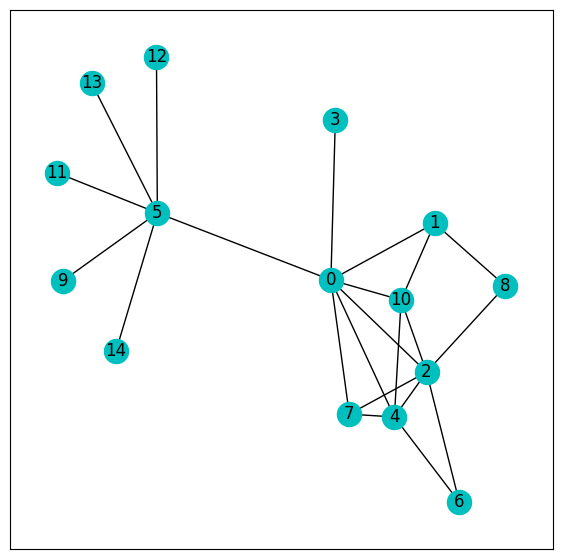

In [151]:
plt.figure(figsize=(7,7))
plt.xticks([])
plt.yticks([])
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                  node_color='c')


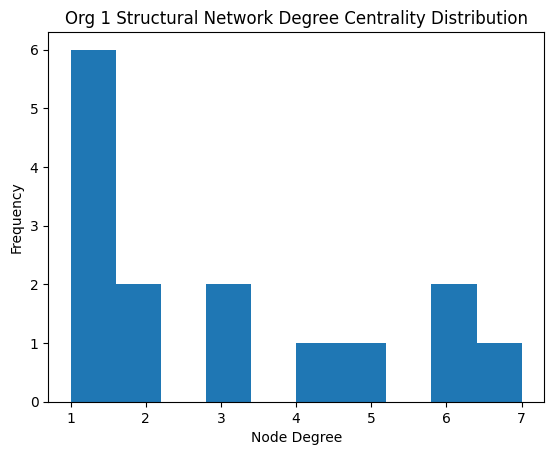

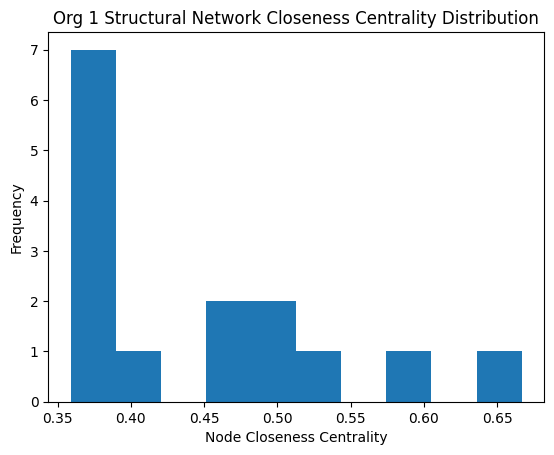

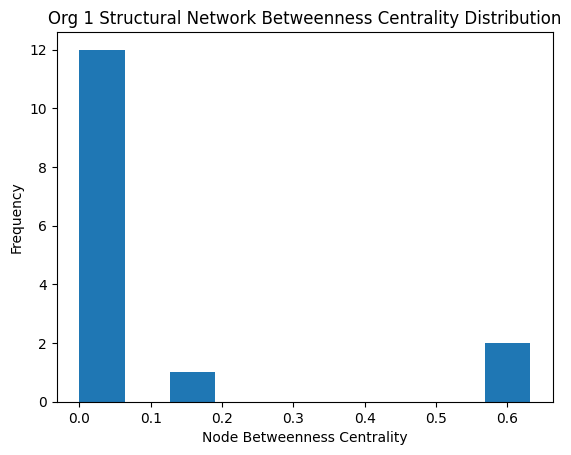

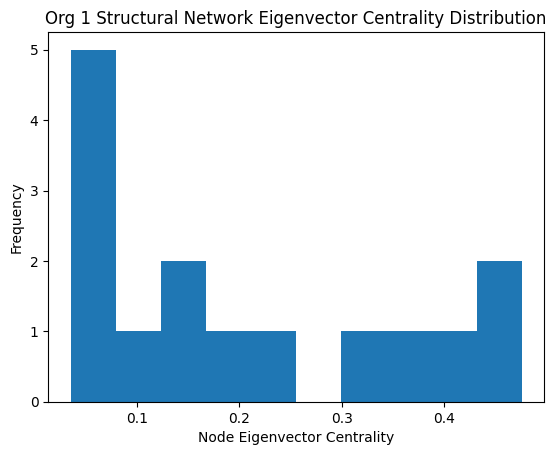

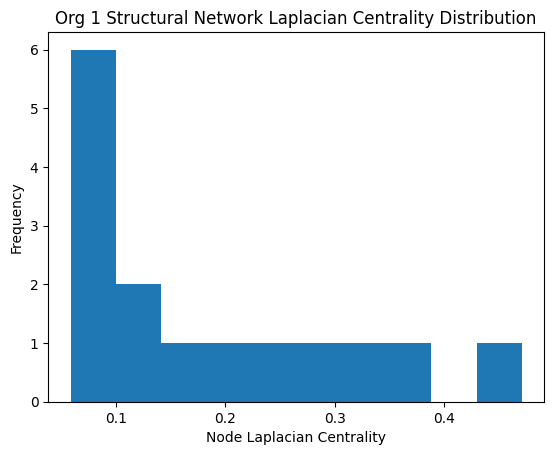

Number of nodes = 15
Number of edges = 22
Average clustering = 0.2857142857142857
Network density = 0.20952380952380953
Network is True connected

Degree Centrality Distribution:
Min = 1 Q1 = 1.0 Q2 = 2.0 Q3 = 4.5 Max = 7
Mean = 2.933333333333333 StDev = 2.1536237457121516

Closeness Centrality Distribution:
Min = 0.358974358974359 Q1 = 0.3783783783783784 Q2 = 0.4117647058823529 Q3 = 0.4913793103448276 Max = 0.6666666666666666
Mean = 0.44670724789872185 StDev = 0.0906952888731411

Betweenness Centrality Distribution:
Min = 0.0 Q1 = 0.0 Q2 = 0.0 Q3 = 0.056227106227106236 Max = 0.6326007326007326
Mean = 0.1010989010989011 StDev = 0.21390704823653586

Eigenvector Centrality Distribution:
Min = 0.03521445395747079 Q1 = 0.03521445395747079 Q2 = 0.15879921260337945 Q3 = 0.34000329579052385 Max = 0.4755118227523917
Mean = 0.20388450397267968 StDev = 0.16398315148584516

Laplacian Centrality Distribution:
Min = 0.05882352941176469 Q1 = 0.05882352941176493 Q2 = 0.11764705882352938 Q3 = 0.268907

In [152]:
#Calculate Network Statistics
G_type = "Org 1 Structural Network"

structural = GraphData(G)
net_stats_printer(G)

In [153]:
#Community Detection
nodelist = list(G.nodes)

node_loc = nx.kamada_kawai_layout(G)
A = nx.to_numpy_array(G, nodelist = nodelist)

clusters = SCL(A, n_clusters=2, random_state = 1234, assign_labels="discretize")


In [154]:
name_to_int_mapping = {name: idx for idx, name in enumerate(G.nodes())}

G = nx.relabel_nodes(G, name_to_int_mapping)
nodelist_ints = list(G.nodes)

node_clusters = list(zip(nodelist, nodelist_ints, clusters))
print(node_clusters)


struct_node_community_dict = {node: cluster for node, cluster in zip(nodelist, clusters)}
print(struct_node_community_dict)

[(0, 0, 0), (1, 1, 0), (2, 2, 0), (3, 3, 0), (4, 4, 0), (5, 5, 1), (6, 6, 0), (7, 7, 0), (8, 8, 0), (9, 9, 1), (10, 10, 0), (11, 11, 1), (12, 12, 1), (13, 13, 1), (14, 14, 1)]
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1}


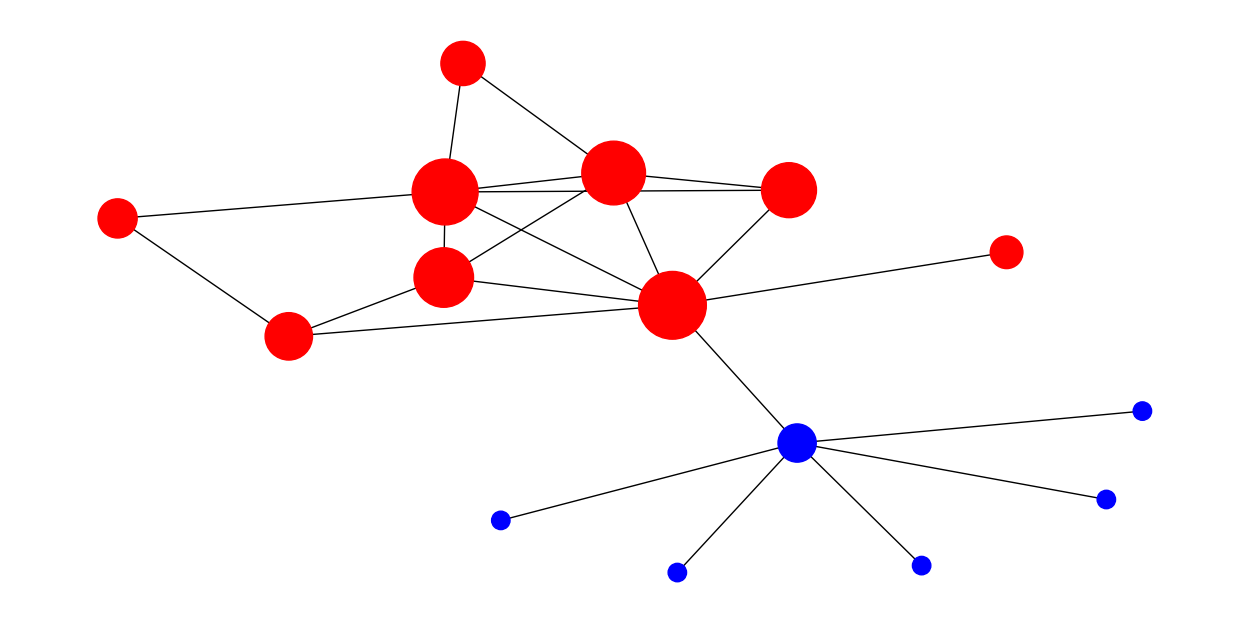

In [155]:
# eig_measure = nx.eigenvector_centrality(G)
# repeat latr for betweenness measure
sizes = np.array([eigen_cents[x] for x in nodelist])  #test w/ eigen_cents instead of eig_measure
node_cols = np.where(clusters==1, 'b', 'r')
# node_labels = {x:x.partition(' ')[0] for x in nodelist}
node_loc = nx.kamada_kawai_layout(G)


fig = plt.figure(figsize=(16,8))
plt.axis('off')
nx.draw(G, nodelist= nodelist, pos=node_loc, node_color = node_cols, \
node_size = sizes*5e3)

# nx.draw_networkx_labels(G,labels=node_labels, pos=node_loc, font_size=14, \
# font_color='k', font_weight='bold', horizontalalignment='left', verticalalignment='top')

# Import Communication CSV

In [114]:
uploaded = files.upload()

Saving FIEL Communication Data.csv to FIEL Communication Data (1).csv


# FIEL Communication Network

In [136]:
file_path = 'FIEL Communication Data.csv'
weighted_adjacency_matrix = read_weighted_adjacency_matrix(file_path)


In [137]:
G = nx.Graph()
G.add_nodes_from(weighted_adjacency_matrix.keys())

for source_node, weights in weighted_adjacency_matrix.items():
    for target_node, weight in weights.items():
        G.add_edge(source_node, target_node, weight=weight)

self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

null_edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] == 0]
G.remove_edges_from(null_edges_to_remove)

print("Graph Nodes:", G.nodes())
print("Graph Edges:", G.edges(data=True))

Graph Nodes: ['Cesar', 'Abraham', 'Aura', 'Olivia', 'Carlos', 'Alain', 'Victor', 'Selena', 'Angelina', 'Tatiana', 'Ileana', 'Irie', 'Estrella', 'Jennifer', 'Alondra']
Graph Edges: [('Cesar', 'Abraham', {'weight': 3}), ('Cesar', 'Aura', {'weight': 3}), ('Cesar', 'Olivia', {'weight': 1}), ('Cesar', 'Carlos', {'weight': 2}), ('Cesar', 'Alain', {'weight': 3}), ('Cesar', 'Victor', {'weight': 3}), ('Cesar', 'Angelina', {'weight': 2}), ('Cesar', 'Tatiana', {'weight': 3}), ('Cesar', 'Irie', {'weight': 3}), ('Cesar', 'Estrella', {'weight': 1}), ('Cesar', 'Jennifer', {'weight': 2}), ('Abraham', 'Aura', {'weight': 2}), ('Abraham', 'Olivia', {'weight': 2}), ('Abraham', 'Carlos', {'weight': 2}), ('Abraham', 'Alain', {'weight': 3}), ('Abraham', 'Victor', {'weight': 3}), ('Abraham', 'Selena', {'weight': 2}), ('Abraham', 'Angelina', {'weight': 3}), ('Abraham', 'Tatiana', {'weight': 3}), ('Abraham', 'Ileana', {'weight': 1}), ('Aura', 'Olivia', {'weight': 3}), ('Aura', 'Carlos', {'weight': 3}), ('Aura',

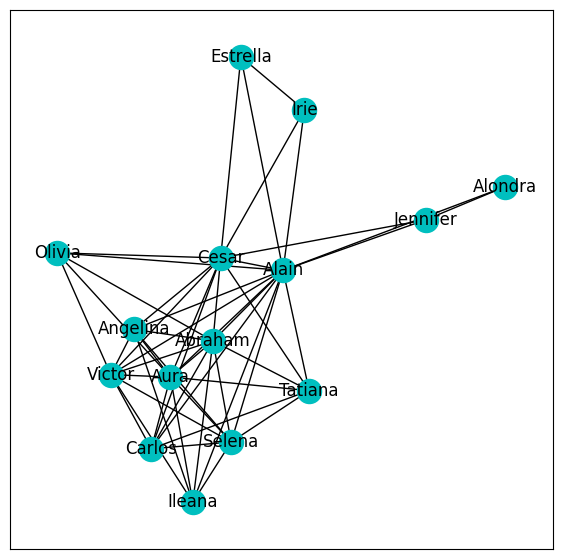

In [138]:
plt.figure(figsize=(7,7))
plt.xticks([])
plt.yticks([])
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=10), with_labels=True,
                  node_color='c')


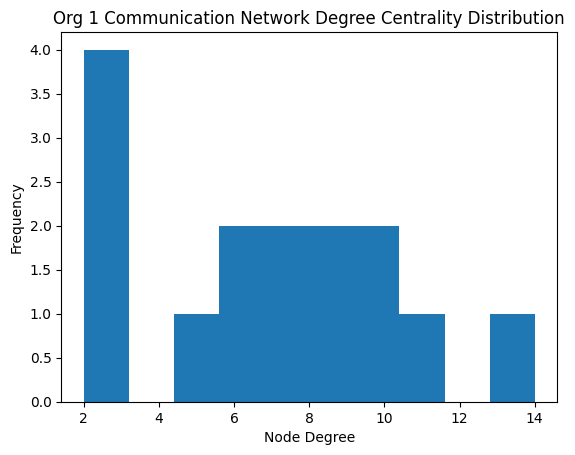

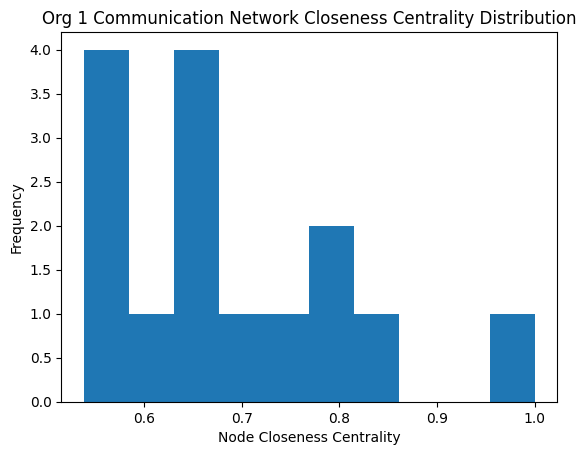

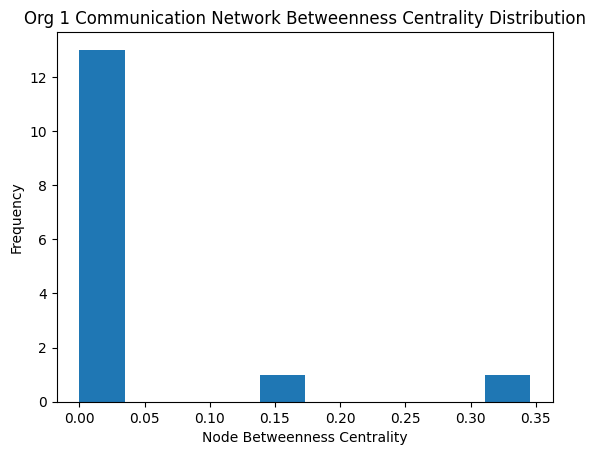

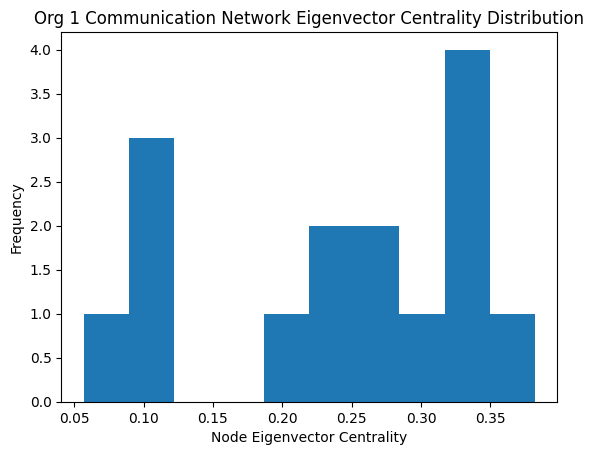

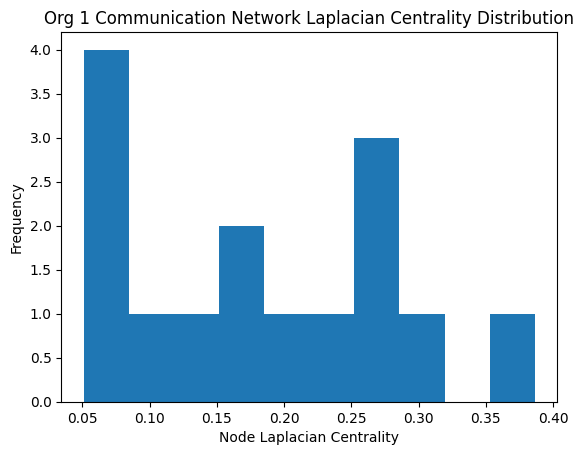

Number of nodes = 15
Number of edges = 52
Average clustering = 0.8243804343804343
Network density = 0.49523809523809526
Network is True connected

Degree Centrality Distribution:
Min = 2 Q1 = 4.0 Q2 = 7.0 Q3 = 9.5 Max = 14
Mean = 6.933333333333334 StDev = 3.453086955726647

Closeness Centrality Distribution:
Min = 0.5384615384615384 Q1 = 0.5843478260869566 Q2 = 0.6666666666666666 Q3 = 0.7573099415204678 Max = 1.0
Mean = 0.6832763246186319 StDev = 0.12480640900823597

Betweenness Centrality Distribution:
Min = 0.0 Q1 = 0.0 Q2 = 0.0037676609105180537 Q3 = 0.022448979591836737 Max = 0.34589220303506024
Mean = 0.03882783882783883 StDev = 0.0919713896358593

Eigenvector Centrality Distribution:
Min = 0.05694910245296548 Q1 = 0.1510274674319796 Q2 = 0.26910123892366455 Q3 = 0.31984676138093077 Max = 0.38191145484085337
Mean = 0.2370135887975203 StDev = 0.10602168945207105

Laplacian Centrality Distribution:
Min = 0.05105105105105107 Q1 = 0.083583583583583 Q2 = 0.1835168501835165 Q3 = 0.27293

In [139]:
G_type = "Org 1 Communication Network"

communication = GraphData(G)
net_stats_printer(G)

In [140]:
#Community Detection
nodelist = list(G.nodes)

node_loc = nx.kamada_kawai_layout(G)
A = nx.to_numpy_array(G, nodelist = nodelist)

clusters = SCL(A, n_clusters=2, random_state = 1234, assign_labels="discretize")

name_to_int_mapping = {name: idx for idx, name in enumerate(G.nodes())}

G = nx.relabel_nodes(G, name_to_int_mapping)
nodelist_ints = list(G.nodes)


node_clusters = list(zip(nodelist, nodelist_ints, clusters))
print(node_clusters)

comm_node_community_dict = {node: cluster for node, cluster in zip(nodelist, clusters)}
print(comm_node_community_dict)

# comm_community_dict = dict(zip(nodelist, node_clusters))
# print(comm_community_dict)

[('Cesar', 0, 0), ('Abraham', 1, 0), ('Aura', 2, 0), ('Olivia', 3, 0), ('Carlos', 4, 0), ('Alain', 5, 1), ('Victor', 6, 0), ('Selena', 7, 0), ('Angelina', 8, 0), ('Tatiana', 9, 0), ('Ileana', 10, 0), ('Irie', 11, 1), ('Estrella', 12, 1), ('Jennifer', 13, 1), ('Alondra', 14, 1)]
{'Cesar': 0, 'Abraham': 0, 'Aura': 0, 'Olivia': 0, 'Carlos': 0, 'Alain': 1, 'Victor': 0, 'Selena': 0, 'Angelina': 0, 'Tatiana': 0, 'Ileana': 0, 'Irie': 1, 'Estrella': 1, 'Jennifer': 1, 'Alondra': 1}


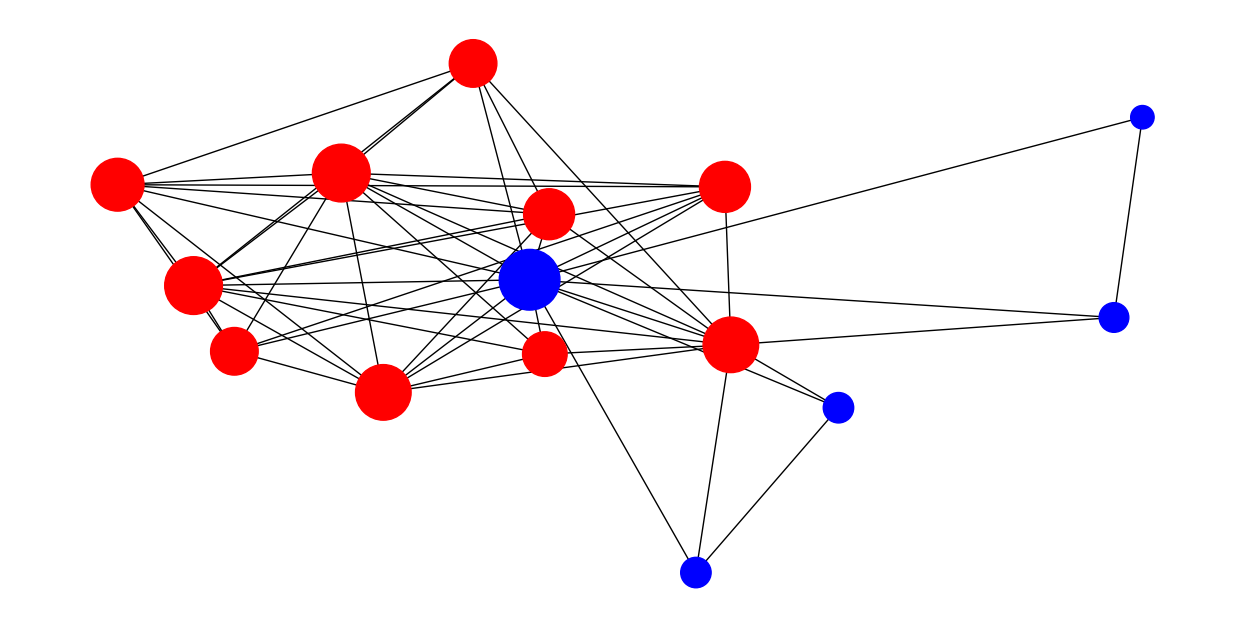

In [141]:
# eig_measure = nx.eigenvector_centrality(G)
# repeat latr for betweenness measure
sizes = np.array([eigen_cents[x] for x in nodelist_ints])  #test w/ eigen_cents instead of eig_measure
node_cols = np.where(clusters==1, 'b', 'r')
# node_labels = {x:x.partition(' ')[0] for x in nodelist}
node_loc = nx.kamada_kawai_layout(G)


fig = plt.figure(figsize=(16,8))
plt.axis('off')
nx.draw(G, nodelist= nodelist_ints, pos=node_loc, node_color = node_cols, \
node_size = sizes*5e3)

# nx.draw_networkx_labels(G,labels=node_labels, pos=node_loc, font_size=14, \
# font_color='k', font_weight='bold', horizontalalignment='left', verticalalignment='top')




# Import Help CSV

In [165]:
uploaded = files.upload()

Saving FIEL Help Data.csv to FIEL Help Data (2).csv


# FIEL Help Network

In [167]:
file_path = 'FIEL Help Data (2).csv'
weighted_adjacency_matrix = read_weighted_adjacency_matrix(file_path)


In [168]:
G = nx.DiGraph()

G.add_nodes_from(weighted_adjacency_matrix.keys())

for source_node, weights in weighted_adjacency_matrix.items():
    for target_node, weight in weights.items():
        G.add_edge(source_node, target_node, weight=weight)

self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

null_edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] == 0]
G.remove_edges_from(null_edges_to_remove)

print("Graph Nodes:", G.nodes())
print("Graph Edges:", G.edges(data=True))

Graph Nodes: ['Cesar', 'Abraham', 'Aura', 'Olivia', 'Carlos', 'Alain', 'Victor', 'Selena', 'Angelina', 'Tatiana', 'Ileana', 'Irie', 'Estrella', 'Jennifer', 'Alondra']
Graph Edges: [('Abraham', 'Cesar', {'weight': 3}), ('Abraham', 'Aura', {'weight': 2}), ('Abraham', 'Carlos', {'weight': 1}), ('Abraham', 'Alain', {'weight': 1}), ('Abraham', 'Selena', {'weight': 2}), ('Abraham', 'Angelina', {'weight': 2}), ('Aura', 'Cesar', {'weight': 1}), ('Aura', 'Abraham', {'weight': 1}), ('Aura', 'Olivia', {'weight': 1}), ('Aura', 'Carlos', {'weight': 3}), ('Aura', 'Alain', {'weight': 1}), ('Aura', 'Victor', {'weight': 2}), ('Aura', 'Selena', {'weight': 2}), ('Aura', 'Angelina', {'weight': 1}), ('Carlos', 'Cesar', {'weight': 1}), ('Carlos', 'Aura', {'weight': 3}), ('Carlos', 'Alain', {'weight': 1}), ('Carlos', 'Victor', {'weight': 2}), ('Carlos', 'Selena', {'weight': 2}), ('Alain', 'Cesar', {'weight': 3}), ('Alain', 'Abraham', {'weight': 2}), ('Alain', 'Aura', {'weight': 1}), ('Alain', 'Carlos', {'wei

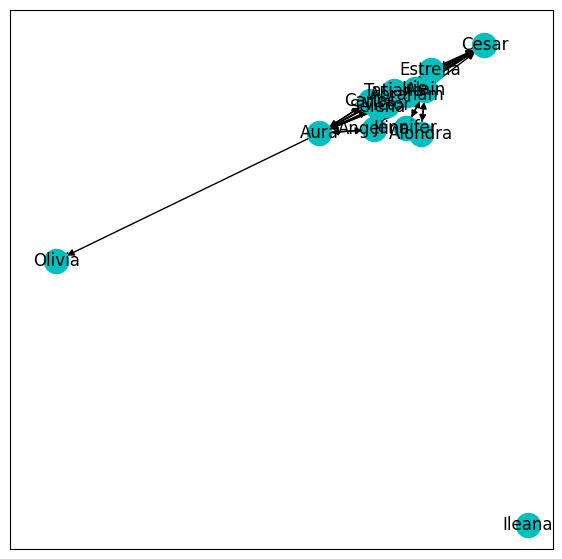

In [169]:
plt.figure(figsize=(7,7))
plt.xticks([])
plt.yticks([])
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                  node_color='c')


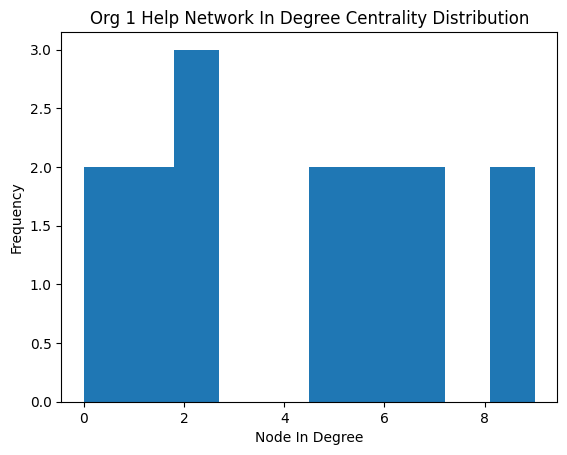

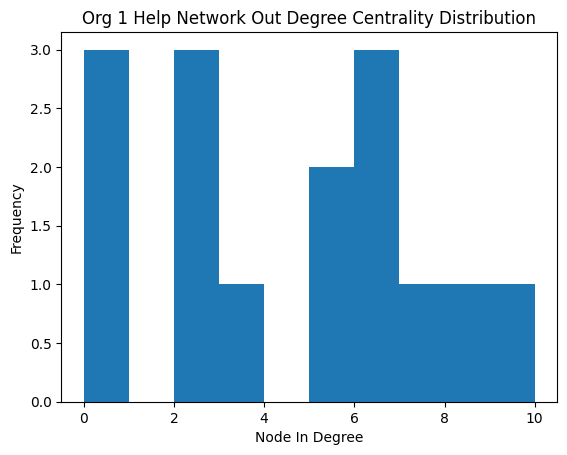

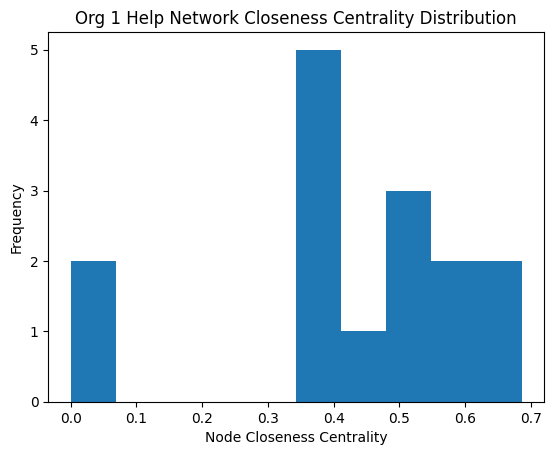

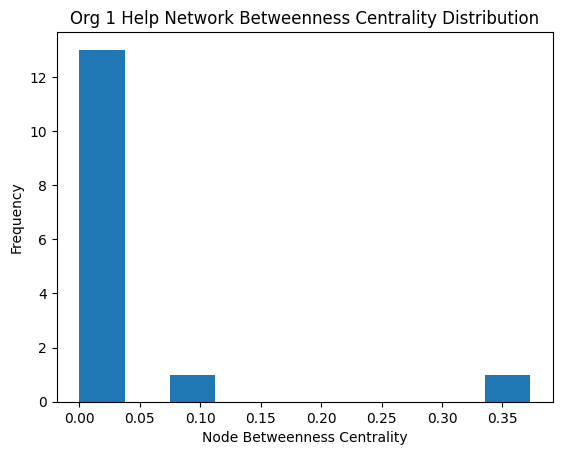

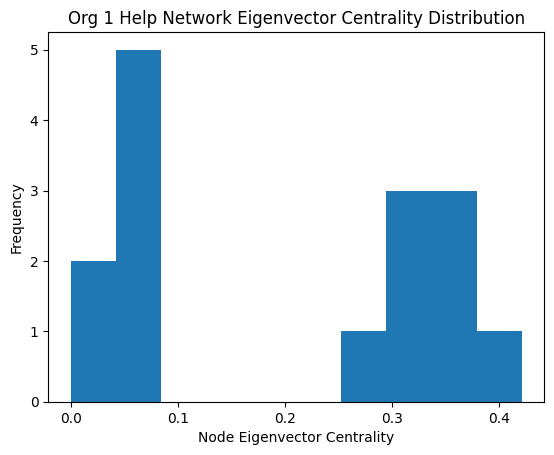

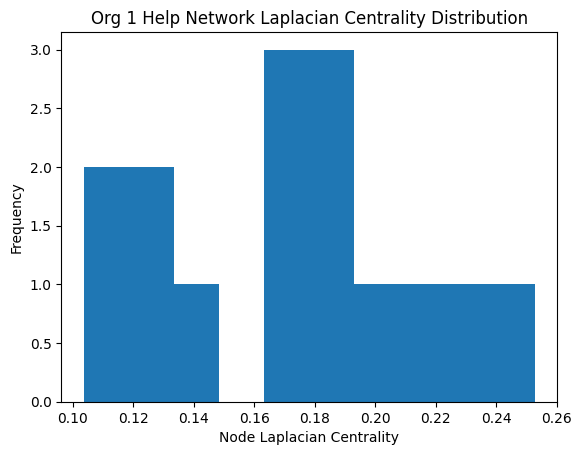

Number of nodes = 15
Number of edges = 62
Average clustering = 0.6096967353745959
Network density = 0.29523809523809524
Network is Not connected

In Degree Centrality Distribution:
Min = 0 Q1 = 1.5 Q2 = 5.0 Q3 = 6.5 Max = 9
Mean = 4.133333333333334 StDev = 3.1592645316516914

Out Degree Centrality Distribution:
Min = 0 Q1 = 2.0 Q2 = 5.0 Q3 = 6.0 Max = 10
Mean = 4.133333333333334 StDev = 3.113717728895491

Percent reciprocal edges = 67.74193548387096

Closeness Centrality Distribution:
Min = 0.0 Q1 = 0.38690476190476186 Q2 = 0.41156462585034015 Q3 = 0.5581845238095238 Max = 0.6857142857142857
Mean = 0.4292370493347841 StDev = 0.2023649741394493

Betweenness Centrality Distribution:
Min = 0.0 Q1 = 0.0 Q2 = 0.0 Q3 = 0.01936813186813187 Max = 0.37307692307692314
Mean = 0.03626373626373627 StDev = 0.09598793340869824

Eigenvector Centrality Distribution:
Min = 4.864381176127248e-14 Q1 = 0.07163240135863527 Q2 = 0.2642991883728055 Q3 = 0.3498391400955616 Max = 0.42124679467986764
Mean = 0.20

In [170]:
G_type = "Org 1 Help Network"

helpn = GraphData(G)
net_stats_printer(G)

{'Aura': 0, 'Angelina': 0, 'Abraham': 0, 'Victor': 0, 'Olivia': 0, 'Tatiana': 0, 'Selena': 0, 'Carlos': 0, 'Alondra': 1, 'Cesar': 1, 'Jennifer': 1, 'Irie': 1, 'Estrella': 1, 'Alain': 1, 'Ileana': 2}


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


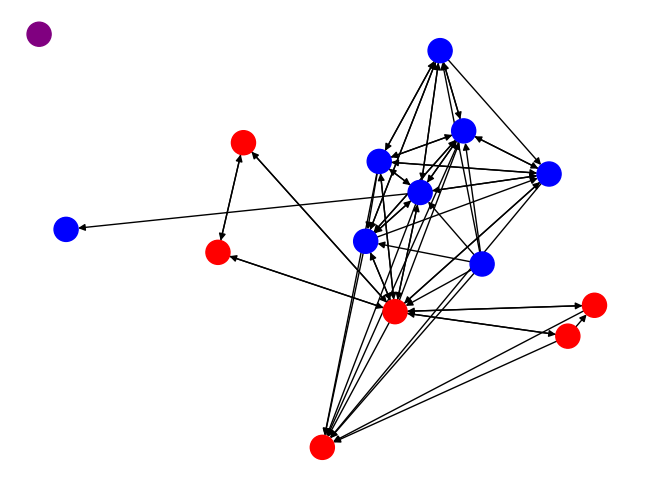

In [171]:
#Community Detection
nodelist = list(G.nodes)


node_loc = nx.kamada_kawai_layout(G)
A = nx.to_numpy_array(G, nodelist = nodelist)


communities = greedy_modularity_communities(G)

help_node_community_dict = {node: community_id for community_id, community in enumerate(communities) for node in community}

# Assign colors based on communities
# node_colors = [node_community_dict[node] for node in G.nodes]
# node_colors = np.where(clusters == 0, 'blue', 'red')
community_color_dict = {0: 'blue', 1: 'red', 2: 'purple'}

print(help_node_community_dict)

node_colors = [community_color_dict[help_node_community_dict[node]] for node in G.nodes]

k_value = 1.1
pos = nx.spring_layout(G, k=k_value)
nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.rainbow)

# Show the plot
plt.show()

In [172]:
name_to_int_mapping = {name: idx for idx, name in enumerate(G.nodes())}

G = nx.relabel_nodes(G, name_to_int_mapping)
nodelist_ints = list(G.nodes)

nodelist_both = list(zip(nodelist , nodelist_ints))

print(nodelist_both)


# node_communities = list(zip(nodelist, nodelist_ints, communities))
# print(node_communities)

[('Cesar', 0), ('Abraham', 1), ('Aura', 2), ('Olivia', 3), ('Carlos', 4), ('Alain', 5), ('Victor', 6), ('Selena', 7), ('Angelina', 8), ('Tatiana', 9), ('Ileana', 10), ('Irie', 11), ('Estrella', 12), ('Jennifer', 13), ('Alondra', 14)]


# Import Trust CSV

In [97]:
uploaded = files.upload()

Saving FIEL Trust Data.csv to FIEL Trust Data (1).csv


# FIEL Trust Network

In [129]:
file_path = 'FIEL Trust Data.csv'
weighted_adjacency_matrix = read_weighted_adjacency_matrix(file_path)

In [130]:
G = nx.DiGraph()

G.add_nodes_from(weighted_adjacency_matrix.keys())

for source_node, weights in weighted_adjacency_matrix.items():
    for target_node, weight in weights.items():
        G.add_edge(source_node, target_node, weight=weight)

self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

null_edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] == 0]
G.remove_edges_from(null_edges_to_remove)

print("Graph Nodes:", G.nodes())
print("Graph Edges:", G.edges(data=True))

Graph Nodes: ['Cesar', 'Abraham', 'Aura', 'Olivia', 'Carlos', 'Alain', 'Victor', 'Selena', 'Angelina', 'Tatiana', 'Ileana', 'Irie', 'Estrella', 'Jennifer', 'Alondra']
Graph Edges: [('Cesar', 'Abraham', {'weight': 3}), ('Cesar', 'Aura', {'weight': 3}), ('Cesar', 'Olivia', {'weight': 3}), ('Cesar', 'Carlos', {'weight': 3}), ('Cesar', 'Alain', {'weight': 3}), ('Cesar', 'Victor', {'weight': 3}), ('Cesar', 'Selena', {'weight': 3}), ('Cesar', 'Angelina', {'weight': 1}), ('Cesar', 'Tatiana', {'weight': 3}), ('Cesar', 'Ileana', {'weight': 1}), ('Cesar', 'Irie', {'weight': 3}), ('Cesar', 'Estrella', {'weight': 3}), ('Cesar', 'Jennifer', {'weight': 2}), ('Cesar', 'Alondra', {'weight': 2}), ('Abraham', 'Cesar', {'weight': 3}), ('Abraham', 'Aura', {'weight': 3}), ('Abraham', 'Olivia', {'weight': 3}), ('Abraham', 'Carlos', {'weight': 3}), ('Abraham', 'Alain', {'weight': 3}), ('Abraham', 'Victor', {'weight': 2}), ('Abraham', 'Selena', {'weight': 3}), ('Abraham', 'Angelina', {'weight': 3}), ('Abraham

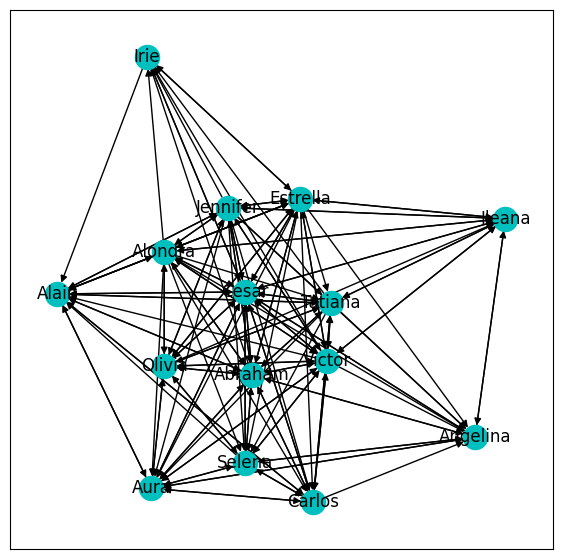

In [131]:
plt.figure(figsize=(7,7))
plt.xticks([])
plt.yticks([])
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                  node_color='c')


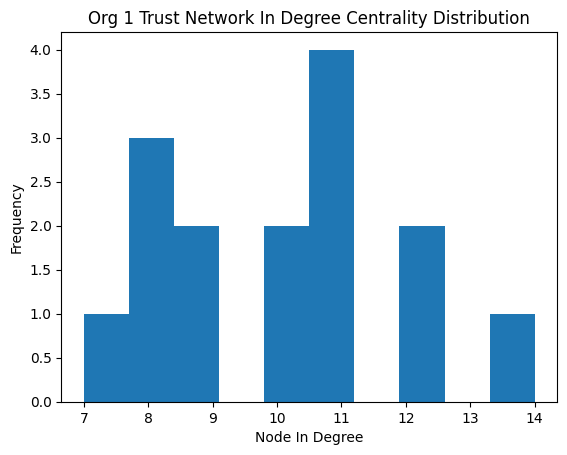

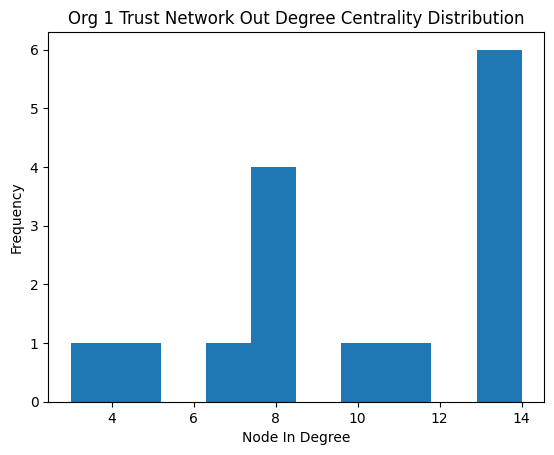

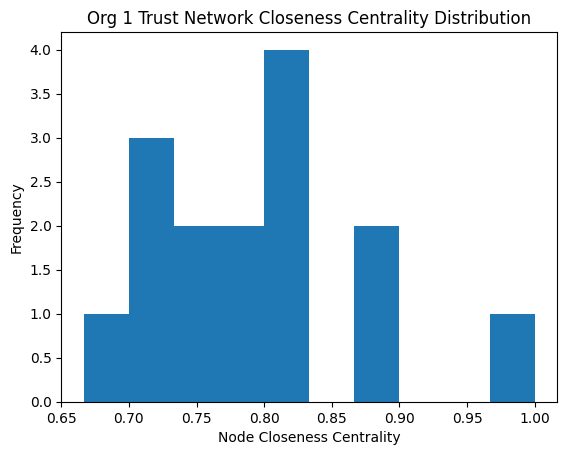

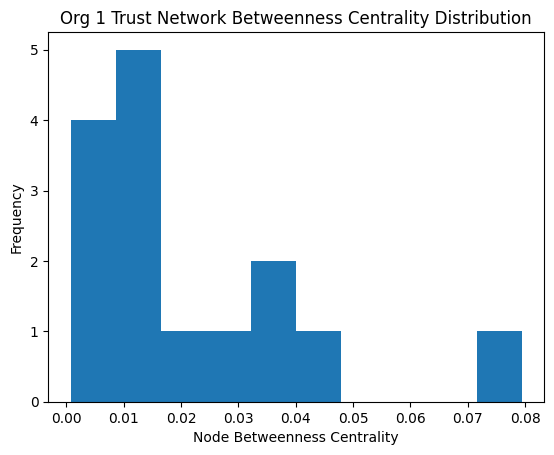

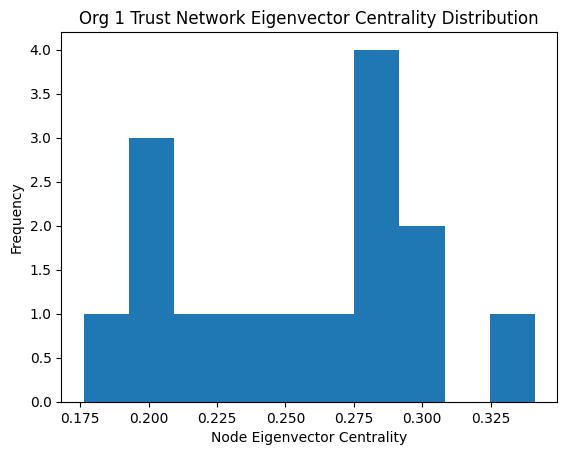

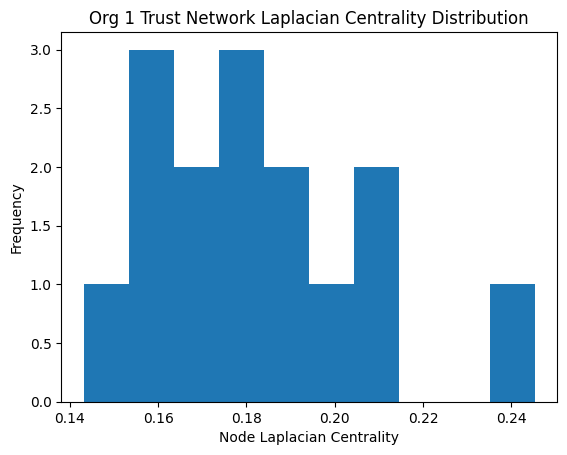

Number of nodes = 15
Number of edges = 151
Average clustering = 0.7817802465554302
Network density = 0.719047619047619
Network is Strongly connected

In Degree Centrality Distribution:
Min = 7 Q1 = 8.5 Q2 = 10.0 Q3 = 11.0 Max = 14
Mean = 10.066666666666666 StDev = 1.9073791542572855

Out Degree Centrality Distribution:
Min = 3 Q1 = 8.0 Q2 = 10.0 Q3 = 14.0 Max = 14
Mean = 10.066666666666666 StDev = 3.6735865438612025

Percent reciprocal edges = 80.79470198675497

Closeness Centrality Distribution:
Min = 0.6666666666666666 Q1 = 0.7184210526315788 Q2 = 0.7777777777777778 Q3 = 0.8235294117647058 Max = 1.0
Mean = 0.7893349386538239 StDev = 0.08803475421800853

Betweenness Centrality Distribution:
Min = 0.0007849293563579278 Q1 = 0.00932866736438165 Q2 = 0.014120006977149834 Q3 = 0.030323347287633008 Max = 0.07937380080237223
Mean = 0.02161172161172161 StDev = 0.020365172743020337

Eigenvector Centrality Distribution:
Min = 0.17633413642771875 Q1 = 0.2097269662682545 Q2 = 0.2617073971586572 

In [132]:
G_type = "Org 1 Trust Network"

trust = GraphData(G)
net_stats_printer(G)

{'Cesar': 0, 'Ileana': 0, 'Aura': 0, 'Angelina': 0, 'Victor': 0, 'Olivia': 0, 'Tatiana': 0, 'Selena': 0, 'Carlos': 0, 'Alondra': 1, 'Irie': 1, 'Jennifer': 1, 'Alain': 1, 'Estrella': 1, 'Abraham': 1}


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


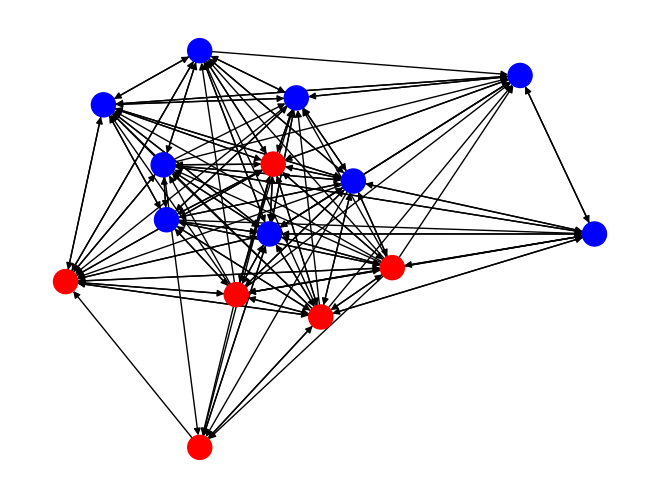

In [133]:
nodelist = list(G.nodes)

node_loc = nx.kamada_kawai_layout(G)
A = nx.to_numpy_array(G, nodelist = nodelist)

communities = greedy_modularity_communities(G)
trust_node_community_dict = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_color_dict = {0: 'blue', 1: 'red', 2: 'purple'}
node_colors = [community_color_dict[trust_node_community_dict[node]] for node in G.nodes]


print(trust_node_community_dict)


k_value = 0.7
pos = nx.spring_layout(G, k=k_value)
nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.rainbow)

plt.show()



In [134]:
name_to_int_mapping = {name: idx for idx, name in enumerate(G.nodes())}

G = nx.relabel_nodes(G, name_to_int_mapping)
nodelist_ints = list(G.nodes)

nodelist_both = list(zip(nodelist , nodelist_ints))

print(nodelist_both)


# node_communities = list(zip(nodelist, nodelist_ints, communities))
# print(node_communities)

[('Cesar', 0), ('Abraham', 1), ('Aura', 2), ('Olivia', 3), ('Carlos', 4), ('Alain', 5), ('Victor', 6), ('Selena', 7), ('Angelina', 8), ('Tatiana', 9), ('Ileana', 10), ('Irie', 11), ('Estrella', 12), ('Jennifer', 13), ('Alondra', 14)]


# NEW METRICS

In [160]:
#Structural Connectivity Score.
struct_connect = (structural.closeness_avg + structural.density)/2 #Bc both their potential maxes are 1
print("Structural Connectivity Score =" , struct_connect)

#Communication Connectivity Score
comms_connect = (communication.closeness_avg + communication.density)/2
print("Communication Connectivity Score =" , comms_connect)

#Help Connectivity Score
help_connect = (helpn.closeness_avg + helpn.density)/2
print("Help Connectivity Score =" , help_connect)

#Informal Connectivity Score
inform_connect = ((comms_connect + help_connect)/2)
print("Informal Connectivity Score =" , inform_connect)

#Formal-Informal Connectivity Discrepancy Score
fi_discrepancy = struct_connect - inform_connect
print("Formal-Informal Discrepancy =" , fi_discrepancy)

Structural Connectivity Score = 0.3281155287112657
Communication Connectivity Score = 0.5892572099283635
Help Connectivity Score = 0.3622375722864397
Informal Connectivity Score = 0.4757473911074016
Formal-Informal Discrepancy = -0.1476318623961359


In [158]:
#Mutual Trust Score
mutual_trust = (trust.closeness_avg + trust.density)/2 * trust.reciprocal_percent/100
print("Mutual Trust score =" , mutual_trust)

Mutual Trust score = 0.6093465961575366


In [159]:
#Relational Coordination Score
rc_score = 0.47 * comms_connect + 0.20 * help_connect + 0.33 * mutual_trust
print("Relational Coordination Score =" , rc_score)

Relational Coordination Score = 0.5504827798556059


In [46]:
#Bridge Vulnerability Score
def bridge_vulnerability(G_original):
    if G_original.is_directed():
        G = G_original.to_undirected()
        conversion_note = "Converted to undirected. "
    else:
        G = copy.deepcopy(G_original)
        conversion_note = ""

    def calculate_component_vulnerability(G_component):
        centrality = nx.betweenness_centrality(G_component)
        sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)
        original_path_length = nx.average_shortest_path_length(G_component)

        increased_path_lengths = []
        for i, node in enumerate(sorted_nodes[:3]):
            G_component.remove_node(node)
            if nx.is_connected(G_component):
                new_path_length = nx.average_shortest_path_length(G_component)
                increase = new_path_length - original_path_length
                weighted_increase = increase * (0.5 ** i)
                increased_path_lengths.append(weighted_increase)
                original_path_length = new_path_length
            else:
                return f"The network has become disconnected after deleting {i+1} nodes.", sum(increased_path_lengths)
        return f"Network remains connected after deleting {i+1}.", sum(increased_path_lengths)

    if not nx.is_connected(G):
        largest_component = max(nx.connected_components(G), key=len)
        G_largest_component = G.subgraph(largest_component).copy()
        component_size = len(G_largest_component.nodes())
        vulnerability_info = calculate_component_vulnerability(G_largest_component)
        return f"{conversion_note}Initial network was disconnected. Focused on the largest component (size: {component_size}).", vulnerability_info
    else:
        return calculate_component_vulnerability(G)



print("structural")
print(bridge_vulnerability(structural.G))
print("comm")
print(bridge_vulnerability(communication.G))
print("help")
print(bridge_vulnerability(helpn.G))
print("trust")
print(bridge_vulnerability(trust.G))


structural
('The network has become disconnected after deleting 1 nodes.', 0)
comm
('The network has become disconnected after deleting 2 nodes.', 0.28644688644688654)
help
('Converted to undirected. Initial network was disconnected. Focused on the largest component (size: 14).', ('The network has become disconnected after deleting 1 nodes.', 0))
trust
('Network remains connected after deleting 3.', 0.04445554445554456)


In [156]:
#Interclusrte Density Score
def inter_cluster_density(G, partition):
    G_undirected = G.to_undirected()

    communities = set(partition.values())

    community_to_nodes = {c: [node for node, comm in partition.items() if comm == c] for c in communities}

    actual_inter_cluster_edges = 0
    possible_inter_cluster_edges = 0

    for c1 in communities:
        for c2 in communities:
            if c1 < c2:
                nodes_c1 = set(community_to_nodes[c1])
                nodes_c2 = set(community_to_nodes[c2])

                possible_edges = len(nodes_c1) * len(nodes_c2)
                possible_inter_cluster_edges += possible_edges

                actual_edges = sum(1 for edge in G_undirected.edges() if (edge[0] in nodes_c1 and edge[1] in nodes_c2) or (edge[0] in nodes_c2 and edge[1] in nodes_c1))
                actual_inter_cluster_edges += actual_edges

    density = actual_inter_cluster_edges / possible_inter_cluster_edges if possible_inter_cluster_edges else 0
    return density

s_density = inter_cluster_density(structural.G, struct_node_community_dict)
print(f"Structural inter-cluster density: {s_density}")

c_density = inter_cluster_density(communication.G, comm_node_community_dict)
print(f"Community inter-cluster density: {c_density}")

h_density = inter_cluster_density(helpn.G, help_node_community_dict)
print(f"Help inter-cluster density: {h_density}")

t_density = inter_cluster_density(trust.G, trust_node_community_dict)
print(f"Trust inter-cluster density: {t_density}")


Structural inter-cluster density: 0.018518518518518517
Community inter-cluster density: 0.26
Help inter-cluster density: 0.1935483870967742
Trust inter-cluster density: 0.8148148148148148


In [173]:
#Inter Cluster LEADERSHIP Score
def inter_cluster_leader_density(G, partition):
    G_undirected = G.to_undirected()
    degree_centrality = nx.degree_centrality(G_undirected)

    cluster_high_centrality_node = {}
    for node, cluster in partition.items():
        if cluster not in cluster_high_centrality_node:
            cluster_high_centrality_node[cluster] = node
        else:
            current_max_node = cluster_high_centrality_node[cluster]
            if degree_centrality[node] > degree_centrality[current_max_node]:
                cluster_high_centrality_node[cluster] = node

    actual_inter_cluster_edges = 0
    possible_inter_cluster_edges = 0
    clusters = list(cluster_high_centrality_node.keys())
    for i, cluster_i in enumerate(clusters):
        for cluster_j in clusters[i+1:]:
            node_i = cluster_high_centrality_node[cluster_i]
            node_j = cluster_high_centrality_node[cluster_j]

            if G_undirected.has_edge(node_i, node_j):
                actual_inter_cluster_edges += 1

            possible_inter_cluster_edges += 1

    density = actual_inter_cluster_edges / possible_inter_cluster_edges if possible_inter_cluster_edges else 0
    return density

s_leader_density = inter_cluster_leader_density(structural.G, struct_node_community_dict)
print(f"Structural inter-cluster leader density: {s_leader_density}")

c_leader_density = inter_cluster_leader_density(communication.G, comm_node_community_dict)
print(f"Community inter-cluster leader density: {c_leader_density}")

#The folowing removes the outlier Ileana and makes the calculation more useful
filtered_node_community_dict = {node: community for node, community in help_node_community_dict.items() if community != 2}
h_leader_density = inter_cluster_leader_density(helpn.G, filtered_node_community_dict)
print(f"Help inter-cluster leader density: {h_leader_density}")

t_leader_density = inter_cluster_leader_density(trust.G, trust_node_community_dict)
print(f"Trust inter-cluster leader density: {t_leader_density}")


Structural inter-cluster leader density: 1.0
Community inter-cluster leader density: 1.0
Help inter-cluster leader density: 1.0
Trust inter-cluster leader density: 1.0


# End of Notebook
